In [1]:
#Import relevant models
import numpy as np
import pandas as pd
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt

#Importing from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, recall_score

#Importing from tensorflow
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

2023-03-23 17:12:24.024893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
cc = pd.read_csv('../Fraud Detection/creditcard.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

## Data Exploration

In [3]:
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
cc.value_counts().sum()

284807

In [5]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print('No Frauds:', round(cc['Class'].value_counts()[0]/len(cc) * 100,4), '% of the total data')
print('Frauds:', round(cc['Class'].value_counts()[1]/len(cc) * 100,4), '%of the total data')
print('Through this we can see that it is an unbalanced dataset.')

No Frauds: 99.8273 % of the total data
Frauds: 0.1727 %of the total data
Through this we can see that it is an unbalanced dataset.


<AxesSubplot: >

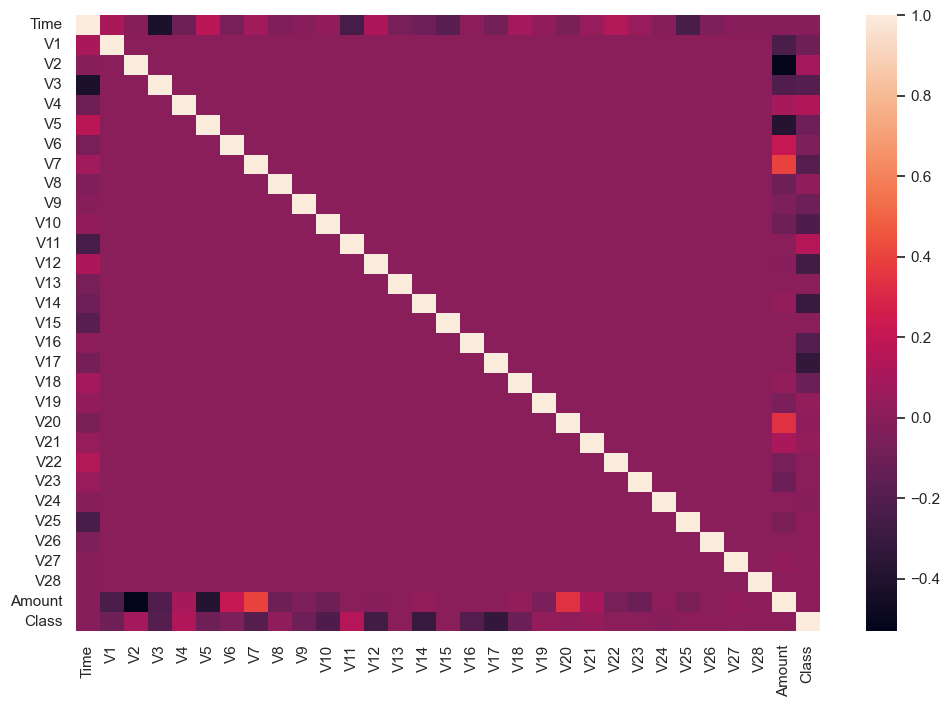

In [8]:
plt.figure(figsize = (12,8))
sns.set(style='whitegrid')
cccorr = cc.corr()
sns.heatmap(cccorr)

In [9]:
def visualise_fraud(feature, dataset):
    print('Fraud transactions')
    print(dataset[feature][dataset.Class==1].describe())
    print()
    print('Normal transactions')
    print(dataset[feature][dataset.Class==0].describe())

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(13, 5))
    ax1.hist(dataset[feature][dataset.Class == 1])
    ax1.set_title('Fraud')

    ax2.hist(dataset[feature][dataset.Class == 0])
    ax2.set_title('Normal')

    plt.xlabel(feature)
    plt.ylabel('Number of Transactions')
    if feature == 'Amount':
        plt.yscale('log')
    plt.show()

Fraud transactions
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal transactions
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


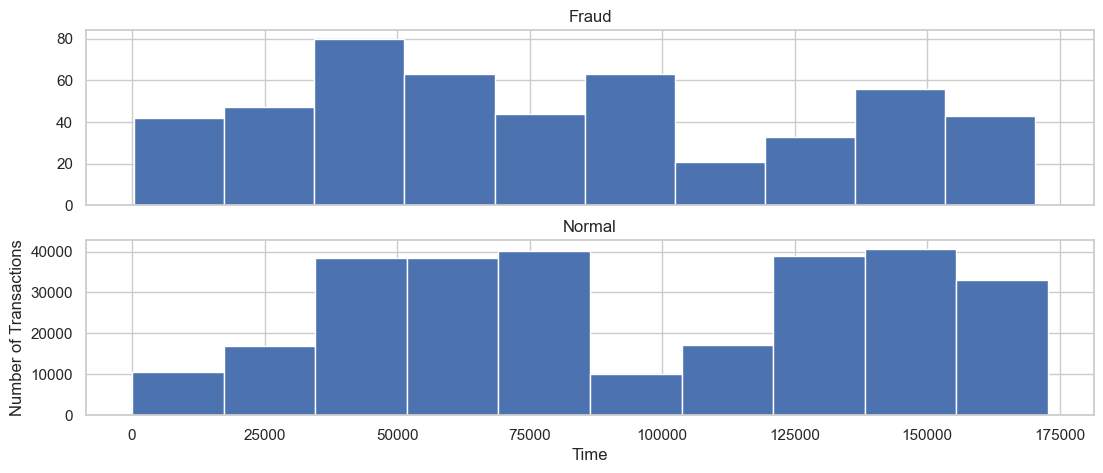

In [10]:
visualise_fraud("Time", cc)

Fraud transactions
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transactions
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


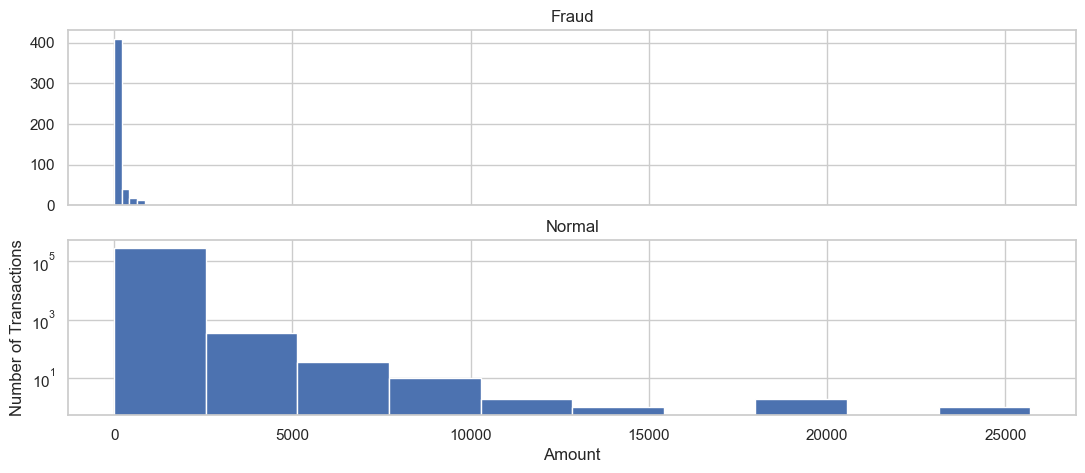

In [11]:
visualise_fraud("Amount", cc)

In [12]:
#To check outliers
Q1 = cc['Amount'].quantile(0.25)
Q3 = cc['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = cc[(cc['Amount']< (Q1 - 1.5 * IQR)) | (cc['Amount'] > (Q3 + 1.5 * IQR))]

print('The indices of the outliers:', outliers.index)

The indices of the outliers: Int64Index([     2,     20,     51,     64,     85,     89,    134,    140,
               142,    147,
            ...
            284703, 284712, 284716, 284732, 284733, 284735, 284748, 284753,
            284757, 284806],
           dtype='int64', length=31904)


## Data Preprocessing

Through the data explorations, we can see that there are two major problems
1. Unbalanced datasets
2. Outliers

In [13]:
#To Deal with outliers
rb_scaler = RobustScaler()

cc['scaled_amount'] = rb_scaler.fit_transform(cc['Amount'].values.reshape(-1,1))
cc['scaled_time'] = rb_scaler.fit_transform(cc['Time'].values.reshape(-1,1))

cc.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
scaled_amount = cc['scaled_amount']
scaled_time = cc['scaled_time']

cc.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
cc.insert(0, 'scaled_amount', scaled_amount)
cc.insert(1, 'scaled_time', scaled_time)

cc.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [25]:
#To deal with unbalanced datasets, I will be using under-sampling, SMOTE requires too much time
cc = cc.sample(frac=1)
fraud = cc.loc[cc['Class']==1]
normal = cc.loc[cc['Class']==0][:492]

cc = pd.concat([fraud, normal])

cc2 = cc.sample(frac=1, random_state=42)

print(cc2.head())
print(cc2['Class'].value_counts()/len(cc2))

        scaled_amount  scaled_time        V1        V2        V3        V4  \
240323      -0.167819     0.773740 -0.373569  0.734968  1.551793 -0.483258   
150644       0.752603     0.107273 -3.821939  5.667247 -9.244963  8.246147   
190884       0.258227     0.520753  2.003400 -0.930231 -1.408065 -1.199209   
8972         2.203032    -0.849387 -4.064005  3.100935 -1.188498  3.264633   
79883        3.465381    -0.310976 -1.322789  1.552768 -2.276921  2.992117   

              V5        V6        V7        V8  ...       V20       V21  \
240323  0.289105  0.039763  0.455017  0.069090  ...  0.043053 -0.118818   
150644 -4.368286 -3.450735 -8.427378  2.305609  ...  1.115247  1.990520   
190884  0.200869  0.698106 -0.590295  0.207128  ... -0.047526  0.077057   
8972   -1.903562  0.320351 -0.954940 -3.277535  ... -0.531898  1.688665   
79883  -1.947064 -0.480288 -1.362388  0.953242  ...  0.988493  0.614969   

             V22       V23       V24       V25       V26       V27       V28  \


<AxesSubplot: >

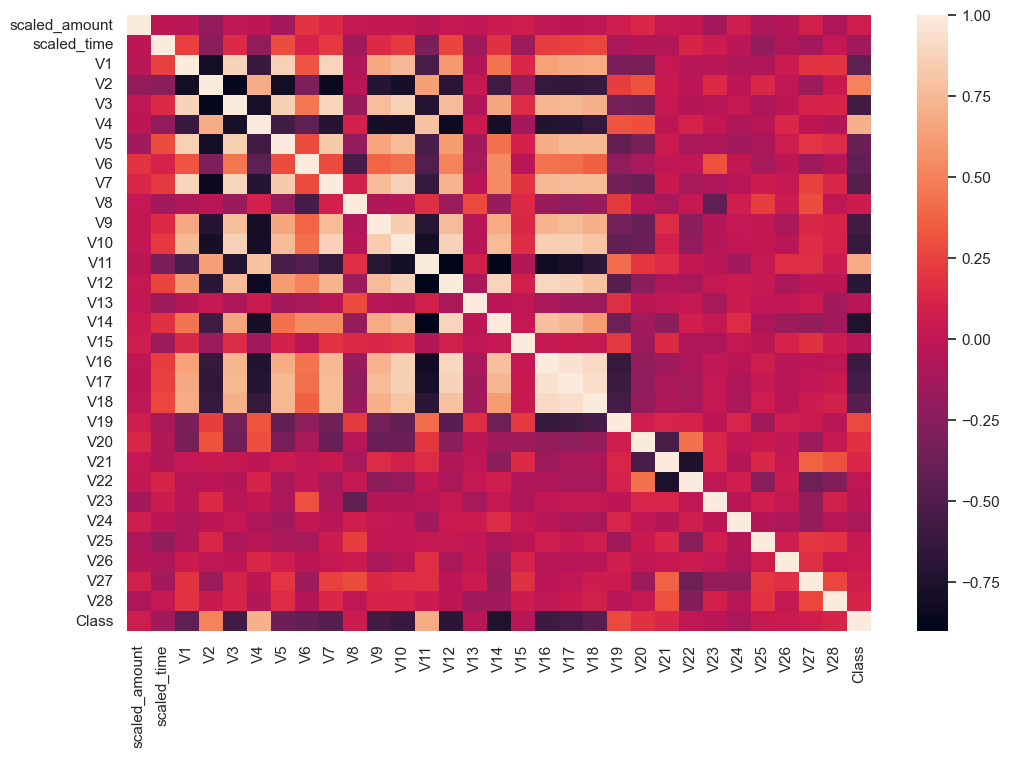

In [16]:
plt.figure(figsize = (12,8))
sns.set(style='whitegrid')
cccorr2 = cc2.corr()
sns.heatmap(cccorr2)

In [17]:
x = cc2.iloc[:, :-1].values
y = cc2.iloc[:, -1].values

## Training Deep Neural Network Model

On this model I will be integrating Deep Neural Network and Random Forest.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
model = Sequential()

model.add(Dense(128,activation  = 'relu',kernel_regularizer=regularizers.l2(0.01), input_dim =30))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation  = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation  = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation ='sigmoid'))
          
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy' , metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='accuracy', patience=10, min_delta=0.01)

2023-01-16 01:32:09.788640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 2.7173 - accuracy: 0.6073 - val_loss: 2.5249 - val_accuracy: 0.8608
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 2.4875 - accuracy: 0.7138 - val_loss: 2.3839 - val_accuracy: 0.9051
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3039 - accuracy: 0.7711 - val_loss: 2.2496 - val_accuracy: 0.9367
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 2.1826 - accuracy: 0.8569 - val_loss: 2.1340 - val_accuracy: 0.9304
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0916 - accuracy: 0.8617 - val_loss: 2.0306 - val_accuracy: 0.9494
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0368 - accuracy: 0.8649 - val_loss: 1.9351 - val_accuracy: 0.9557
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9527 - accuracy: 0.8887 - val_loss: 1.8460 - val_accuracy: 0.9557
Epoch 8/100


In [22]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

# predictions using the DNN model
dnn_predictions = model.predict(X_test)

# predictions using the random forest model
rf_predictions = rf.predict(X_test)

# predictions from the DNN and random forest models using majority voting
final_predictions = []
for dnn_pred, rf_pred in zip(dnn_predictions, rf_predictions):
    if dnn_pred >= 0.5 and rf_pred == 1:
        final_predictions.append(1)
    elif dnn_pred < 0.5 and rf_pred == 0:
        final_predictions.append(0)
    else:
        final_predictions.append(1 if dnn_pred >= 0.5 else 0)

# evaluate the performance of the final model
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy: {:.2f}%".format(accuracy*100))

7/7 [==============================] - 0s 760us/step
Accuracy: 96.45%


In [23]:
# predictions using the DNN and Random Forest model on the test data
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy: {:.2f}%".format(accuracy*100))

# confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print("Confusion matrix: \n", conf_matrix)

# F1 score and recall
f1 = f1_score(y_test, final_predictions)
print("F1 Score: ", f1)
recall = recall_score(y_test, final_predictions)
print("Recall: ", recall)

7/7 [==============================] - 0s 675us/step
Accuracy: 96.45%
Confusion matrix: 
 [[102   4]
 [  3  88]]
F1 Score:  0.9617486338797815
Recall:  0.967032967032967


<AxesSubplot: >

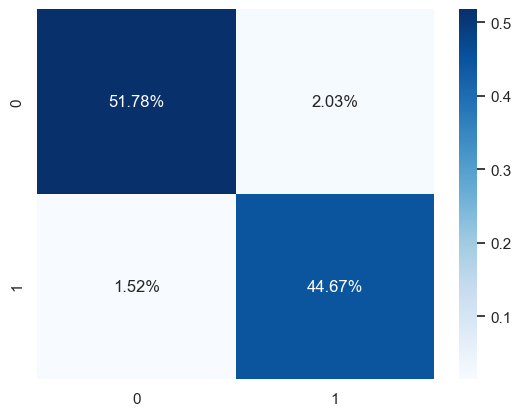

In [24]:
#Percentage of confusion matrix
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')